# Лабораторная работа № 05 (предварительный анализ данных)
## Задание 1-2: Детекция аномалий в данных кредитного скоринга
Используйте набор данных кредитного скоринга с Kaggle ([ссылка на данные](https://www.kaggle.com/mlg-ulb/creditcardfraud)) и определите аномалии в данных, используя Z-score или IQR. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
df_credit = pd.read_csv('data/creditcard.csv')

# Рассчитываем квартели и IQR
Q1 = df_credit.quantile(0.25)
Q3 = df_credit.quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для поиска аномалий
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ищем аномалии в колонке 'V1'
outliers = df_credit[['Time', 'V1']].loc[
    (df_credit['V1'] < lower_bound['V1']) | (df_credit['V1'] > upper_bound['V1'])
]

# Результаты
print("Аномалии в V1: \n", outliers)
print("Среднее абсолютное значение аномалий:", outliers['V1'].abs().mean())
print("Минимальное абсолютное значение аномалий:", outliers['V1'].abs().min())

Аномалии в V1: 
             Time         V1
18          14.0  -5.401258
85          55.0  -4.575093
140         87.0  -5.101877
146         92.0  -5.285971
164        103.0  -6.093248
...          ...        ...
284631  172623.0  -5.459612
284649  172642.0 -11.946976
284772  172760.0  -6.713826
284795  172778.0 -12.516732
284802  172786.0 -11.881118

[7062 rows x 2 columns]
Среднее абсолютное значение аномалий: 7.320195230317657
Минимальное абсолютное значение аномалий: 4.27462768510267


## Задание 3: Обнаружение аномалий в данных о температуре
В наборе данных о температуре в различных городах ([прямая ссылка на данные Kaggle](https://www.kaggle.com/smid80/weatherww2)) обнаружьте аномальные значения температуры.

In [3]:
# Загрузка данных о погоде
df_weather = pd.read_csv('data/summary_of_weather.csv')

# Выбираем только интересующие нас столбцы
df_weather_test = df_weather[['Date', 'MaxTemp', 'MinTemp', 'MeanTemp']]

# Рассчитываем квартели и IQR для температур
Q1 = df_weather_test[['MaxTemp', 'MinTemp', 'MeanTemp']].quantile(0.25)
Q3 = df_weather_test[['MaxTemp', 'MinTemp', 'MeanTemp']].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для поиска аномалий
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ищем аномалии для минимальных температур
outliers_min = df_weather_test[df_weather_test['MinTemp'] < lower_bound['MinTemp']]
print("Аномалии минимальных температур: \n", outliers_min)

# Ищем аномалии для максимальных температур
outliers_max = df_weather_test[df_weather_test['MaxTemp'] > upper_bound['MaxTemp']]
print("Аномалии максимальных температур: \n", outliers_max)

# Ищем аномалии для средних температур
outliers_mean = df_weather_test[
    (df_weather_test['MeanTemp'] < lower_bound['MeanTemp']) | (df_weather_test['MeanTemp'] > upper_bound['MeanTemp'])
]
print("Аномалии средних температур: \n", outliers_mean)

Аномалии минимальных температур: 
               Date    MaxTemp    MinTemp   MeanTemp
10116    1941-10-9 -17.777778 -17.777778 -17.777778
10117   1941-10-18 -17.777778 -17.777778 -17.777778
10118   1941-10-19 -17.777778 -17.777778 -17.777778
10119   1941-10-22 -17.777778 -17.777778 -17.777778
10120   1941-10-24 -17.777778 -17.777778 -17.777778
...            ...        ...        ...        ...
117854   1945-6-24  23.888889   2.222222  13.333333
117858   1945-6-28  19.444444   0.555556  10.000000
117859   1945-6-29  21.666667   1.666667  11.666667
117865    1945-7-5  22.777778 -17.777778 -17.777778
118212   1944-7-22  23.333333   2.222222  12.777778

[7352 rows x 4 columns]
Аномалии максимальных температур: 
               Date    MaxTemp    MinTemp   MeanTemp
32911    1943-5-27  41.666667  24.444444  33.333333
32918     1943-6-3  42.222222  22.777778  32.222222
32919     1943-6-4  42.222222  23.888889  33.333333
32920     1943-6-5  41.666667  25.000000  33.333333
32921     1943-6-6  

/tmp/ipykernel_59706/1491659945.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv('data/summary_of_weather.csv')


In [4]:
# Рассчитываем Z-score для поиска аномалий
df_credit_test = df_credit['V1']
threshold = 3

# Вычисляем Z-оценки
z_scores = np.abs((df_credit_test - df_credit_test.mean()) / df_credit_test.std())

# Ищем аномалии по Z-оценке
outliers_z = df_credit[['Time', 'V1']][z_scores > threshold]

# Печатаем результаты
print("Аномалии на основе Z-score: \n", outliers_z)
print("Среднее абсолютное значение аномалий (по Z-score):", outliers_z['V1'].abs().mean())
print("Минимальное абсолютное значение аномалий (по Z-score):", outliers_z['V1'].abs().min())


Аномалии на основе Z-score: 
             Time         V1
164        103.0  -6.093248
1158       905.0  -6.169664
1632      1264.0 -11.140706
2464      2029.0 -12.168192
2682      2223.0  -7.546256
...          ...        ...
284561  172558.0  -6.491016
284649  172642.0 -11.946976
284772  172760.0  -6.713826
284795  172778.0 -12.516732
284802  172786.0 -11.881118

[3701 rows x 2 columns]
Среднее абсолютное значение аномалий (по Z-score): 9.46021815904413
Минимальное абсолютное значение аномалий (по Z-score): 5.87633718041996


## Задание 4: Прогнозирование пропущенных значений в данных о болезни диабета.
В данных о диабете Pima Indians (Kaggle: [ссылка на данные](https://www.kaggle.com/uciml/pima-indians-diabetes-database)) есть пропущенные значения. Воспользуйтесь методами регрессии или классификации для предсказания пропущенных значений.

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Загрузка данных
df = pd.read_csv('data/diabetes.csv')
df.head()

# Подготовка данных
subset = df[['Insulin', 'DiabetesPedigreeFunction']]
subset.loc[subset['Insulin'] == 0, 'Insulin'] = np.nan  # Использование .loc для замены значений

# Разделение на обучающую и тестовую выборки
train_data = subset.dropna()
test_data = df[['Insulin', 'DiabetesPedigreeFunction']].astype(np.float64)

# Обучение линейной регрессии
model = LinearRegression()
model.fit(train_data[['DiabetesPedigreeFunction']], train_data['Insulin'])

# Заполнение пропущенных значений
predicted_values = model.predict(test_data[['DiabetesPedigreeFunction']])
test_data.loc[:, 'Insulin'] = predicted_values  # Использование .loc для изменения столбца
subset = subset.fillna(test_data)  # Использование метода fillna для замены

# Выводим результат
print(subset)

# Корреляция
print(df[['Insulin', 'DiabetesPedigreeFunction']].corr())


        Insulin  DiabetesPedigreeFunction
0    160.036144                     0.627
1    147.827347                     0.351
2    162.026709                     0.672
3     94.000000                     0.167
4    168.000000                     2.288
..          ...                       ...
763  180.000000                     0.171
764  147.340764                     0.340
765  112.000000                     0.245
766  147.738877                     0.349
767  146.234895                     0.315

[768 rows x 2 columns]
                           Insulin  DiabetesPedigreeFunction
Insulin                   1.000000                  0.185071
DiabetesPedigreeFunction  0.185071                  1.000000


## Задание 5: Обработка пропущенных значений
Используя набор данных о пассажирах Титаника из библиотеки Seaborn (sns.load_dataset('titanic')), необходимо найти и обработать все пропущенные значения. Можно использовать различные методы (например, удаление, заполнение средним значением или медианой). Сравнить результаты.

In [10]:
import seaborn as sns

# Загрузка данных
titanic = sns.load_dataset('titanic')
print(titanic.head())

# Подсчёт пропущенных значений
missing_data = titanic.isnull().sum()
print('\n', missing_data)

# Заполнение пропущенных значений
mode_embarked = titanic['embarked'].mode()[0]
titanic.loc[:, 'embarked'] = titanic['embarked'].fillna(mode_embarked)  # Использование .loc

mode_deck = titanic['deck'].mode()[0]
titanic.loc[:, 'deck'] = titanic['deck'].fillna(mode_deck)  # Использование .loc

mode_embark_town = titanic['embark_town'].mode()[0]
titanic.loc[:, 'embark_town'] = titanic['embark_town'].fillna(mode_embark_town)  # Использование .loc

mean_age = titanic['age'].mean()
titanic.loc[:, 'age'] = titanic['age'].fillna(mean_age)  # Использование .loc

# Проверка после заполнения
missing_data_after = titanic.isnull().sum()
print('\n', missing_data_after)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck    

## Задание 6: Нормализация и стандартизация признаков датасета "Red Wine Quality"
Для набора данных о качестве красного вина ([ссылка на данные](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)) примените различные методы нормализации и стандартизации к признакам, сравните результаты их применения.

      fixed acidity  volatile acidity  residual sugar
0          0.247788          0.961877       -0.428571
1          0.283186          1.967442        0.571429
2          0.283186          1.297065        0.142857
3          0.584071         -1.384443       -0.428571
4          0.247788          0.961877       -0.428571
...             ...               ...             ...
1594       0.141593          0.403229       -0.285714
1595       0.115044          0.123905        0.000000
1596       0.150442         -0.099554        0.142857
1597       0.115044          0.654620       -0.285714
1598       0.123894         -1.216849        2.000000

[1599 rows x 3 columns]


/tmp/ipykernel_59706/954614029.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[0.24778761]
 [0.28318584]
 [0.28318584]
 ...
 [0.15044248]
 [0.11504425]
 [0.12389381]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  wine_subset.loc[:, 'fixed acidity'] = min_max_scaler.fit_transform(wine_data[['fixed acidity']])


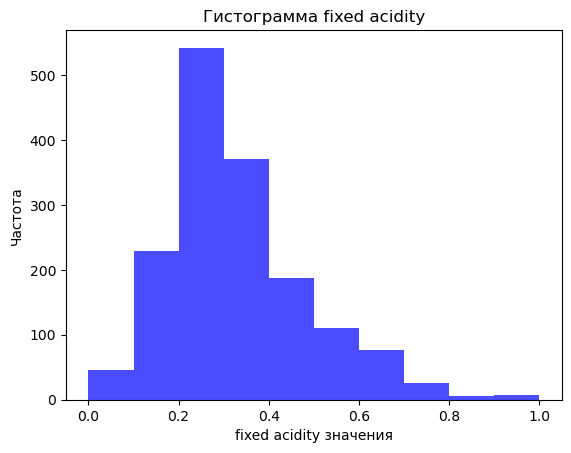

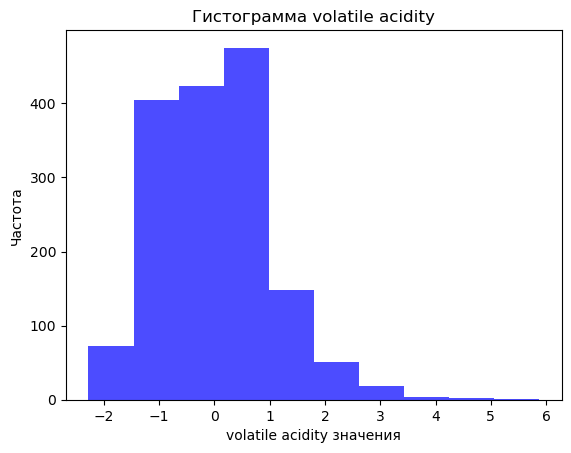

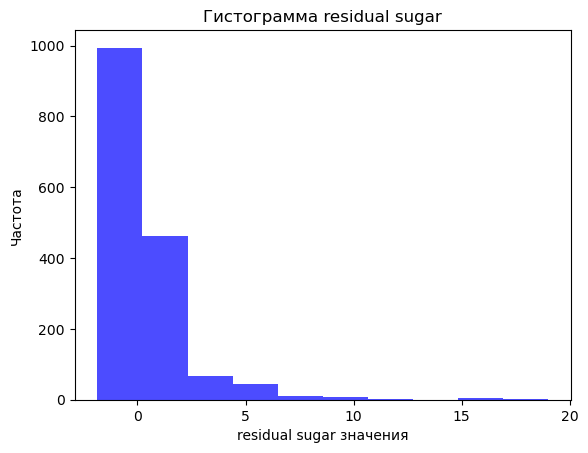

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Загрузка данных
wine_data = pd.read_csv('data/winequality-red.csv')
wine_data.head()

# Подготовка данных для нормализации
wine_subset = wine_data[['fixed acidity', 'volatile acidity', 'residual sugar']].copy()  # Использование .copy()

# Нормализация с использованием MinMaxScaler
min_max_scaler = MinMaxScaler()
wine_subset.loc[:, 'fixed acidity'] = min_max_scaler.fit_transform(wine_data[['fixed acidity']])

# Стандартизация с использованием StandardScaler
std_scaler = StandardScaler()
wine_subset.loc[:, 'volatile acidity'] = std_scaler.fit_transform(wine_data[['volatile acidity']])

# Применение RobustScaler
robust_scaler = RobustScaler()
wine_subset.loc[:, 'residual sugar'] = robust_scaler.fit_transform(wine_data[['residual sugar']])

# Выводим результат
print(wine_subset)

# Построение гистограмм
def plot_histogram(data, column_name, color='blue'):
    plt.hist(data[column_name], bins=10, color=color, alpha=0.7)
    plt.xlabel(f'{column_name} значения')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column_name}')
    plt.show()

plot_histogram(wine_subset, 'fixed acidity')
plot_histogram(wine_subset, 'volatile acidity')
plot_histogram(wine_subset, 'residual sugar')


## Задание 7: Применение описательной статистики и корреляционного анализа для датасета "House Prices"
На данных о ценах на жилье ([ссылка на данные](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)) рассчитайте основные метрики описательной статистики для числовых переменных и рассчитайте корреляции между переменными. Визуализируйте корреляции с помощью тепловых карт и обратите внимание на сильные корреляции.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных о вине
wine_data = pd.read_csv('./data/winequality-red.csv')
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [13]:
# Статистические показатели
average_values = wine_data.mean()
median_values = wine_data.median()
mode_values = wine_data.mode().iloc[0]

print('Среднее значение:\n', average_values, '\n')
print('Медиана:\n', median_values, '\n')
print('Мода:\n', mode_values, '\n')


Среднее значение:
 fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64 

Медиана:
 fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64 

Мода:
 fixed acidity            7.2000
volatile acidity         0.6000
citric acid              0.0000
residual sugar           2.000

In [14]:
# Дополнительные метрики
range_values = wine_data.max() - wine_data.min()
std_deviation = wine_data.std()
third_quartile = wine_data.quantile(0.75)

print('Размах:\n', range_values, '\n')
print('Стандартное отклонение:\n', std_deviation, '\n')
print('Третий квартиль:\n', third_quartile, '\n')


Размах:
 fixed acidity            11.30000
volatile acidity          1.46000
citric acid               1.00000
residual sugar           14.60000
chlorides                 0.59900
free sulfur dioxide      71.00000
total sulfur dioxide    283.00000
density                   0.01362
pH                        1.27000
sulphates                 1.67000
alcohol                   6.50000
quality                   5.00000
dtype: float64 

Стандартное отклонение:
 fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64 

Третий квартиль:
 fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420

In [15]:
# Асимметрия и Куртозис
skewness = wine_data.skew()
kurtosis = wine_data.kurt()

print('Асимметрия:\n', skewness, '\n')
print('Куртозис:\n', kurtosis, '\n')


Асимметрия:
 fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64 

Куртозис:
 fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64 



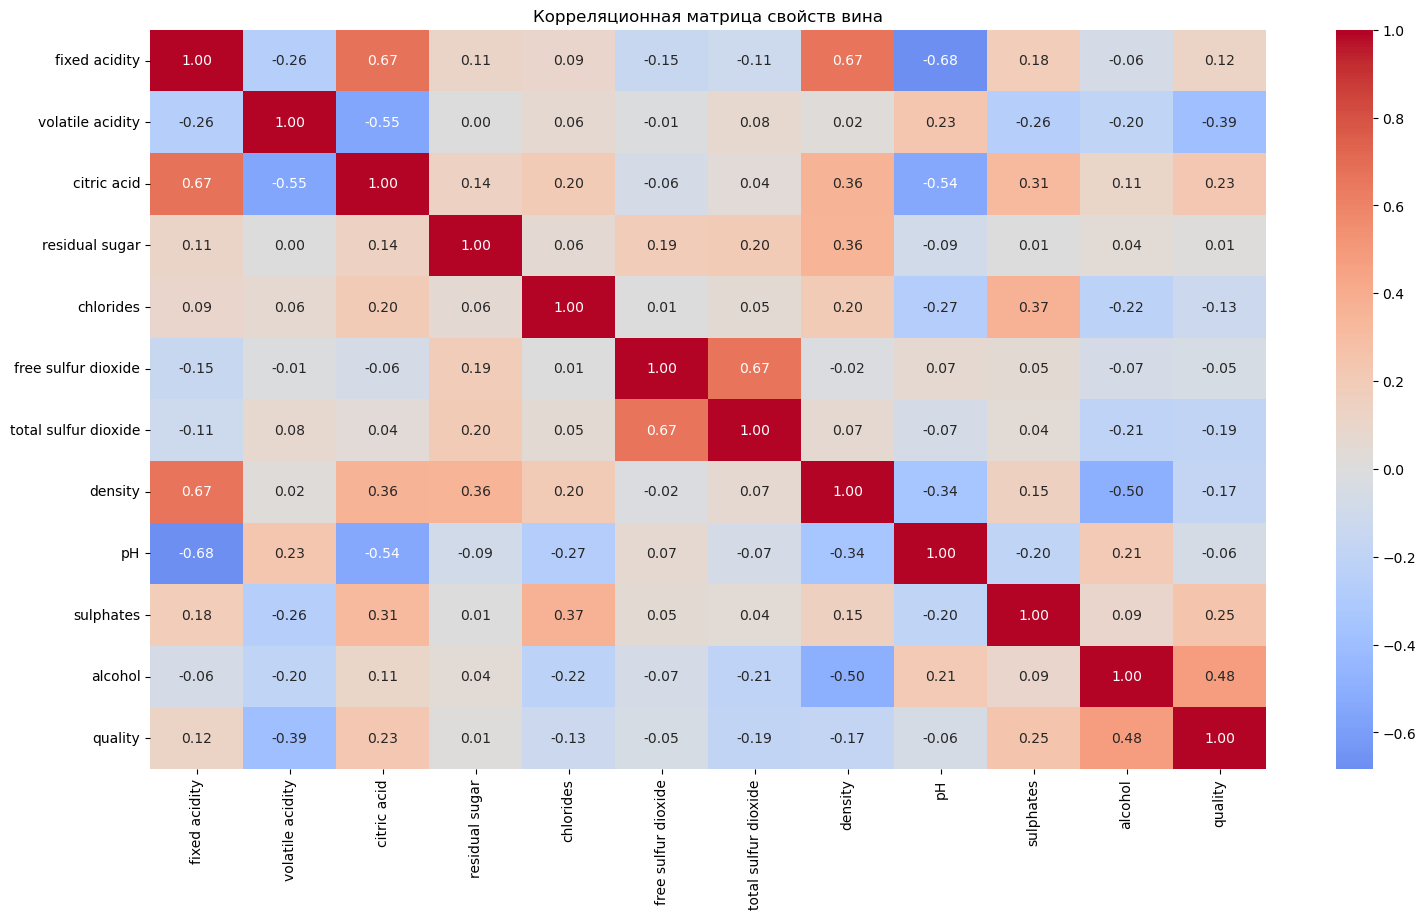

In [16]:
# Корреляция между признаками
correlation_matrix = wine_data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(len(correlation_matrix.columns) * 1.5, len(correlation_matrix.columns) * 0.8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Корреляционная матрица свойств вина')
plt.show()


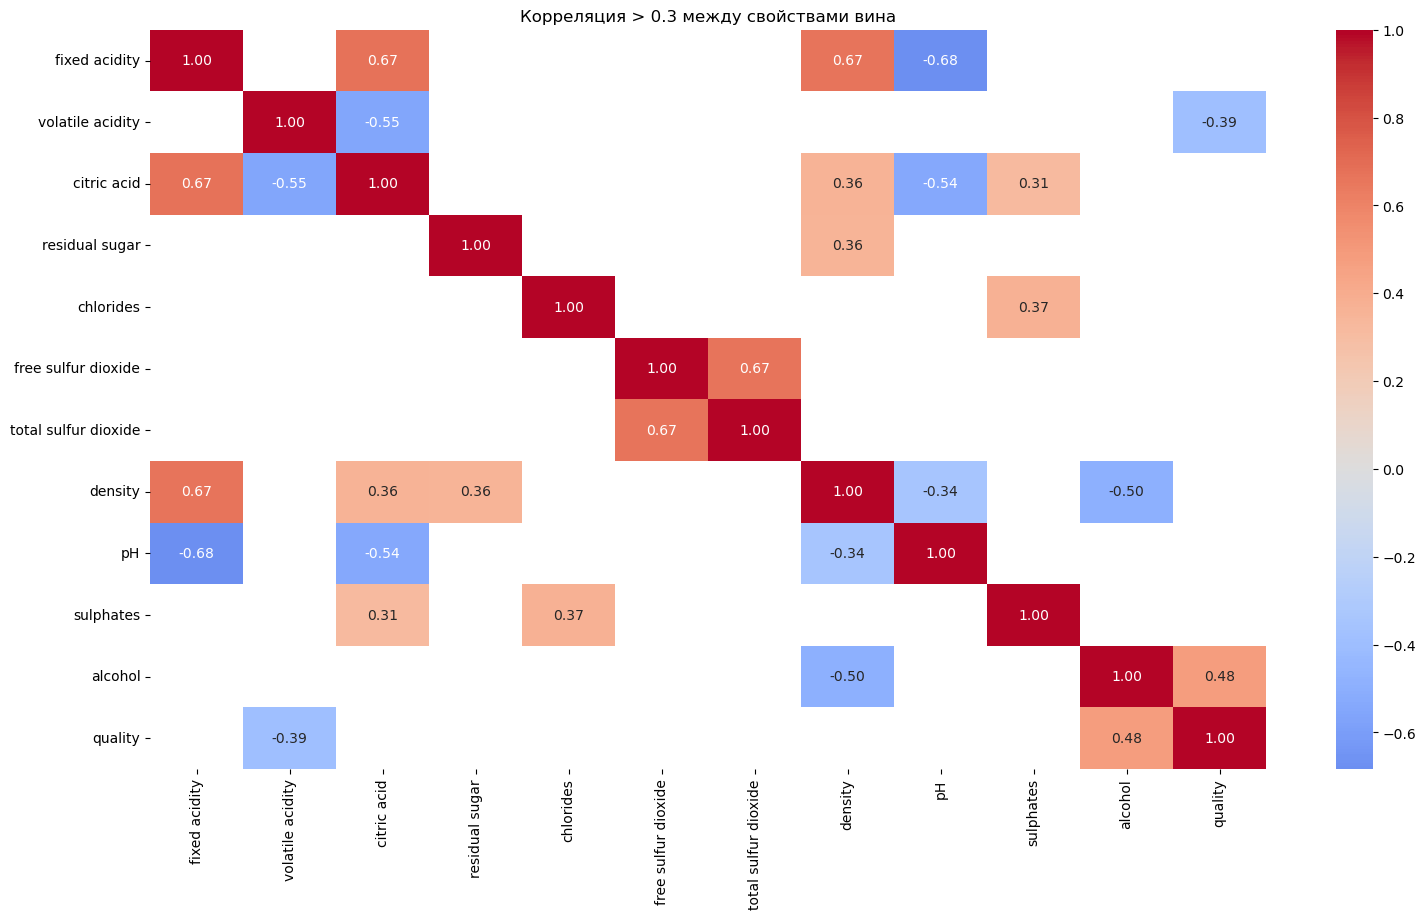

In [17]:
# Корреляция выше 0.3
strong_corr_matrix = correlation_matrix[correlation_matrix.abs() > 0.3]

# Визуализация сильной корреляции
plt.figure(figsize=(len(strong_corr_matrix.columns) * 1.5, len(strong_corr_matrix.columns) * 0.8))
sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Корреляция > 0.3 между свойствами вина')
plt.show()


## Задание 8: Обработка текстовых данных в датасете "Twitter Airline Sentiment"
Набор данных "Twitter Airline Sentiment" на Kaggle ([ссылка на данные](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)) содержит реальные твиты о различных авиакомпаниях. Примените техники предобработки текста, вроде удаления стоп-слов, стемминга, лемматизации и векторизации для подготовки данных к анализу.

In [18]:
import pandas as pd
import nltk
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Загрузка данных о твитах
tweets_data = pd.read_csv('./data/Tweets.csv')
tweets_data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [19]:
# Извлечение текстов твитов
tweet_texts = tweets_data['text'].astype(str)

# Загрузка стоп-слов для удаления
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Фильтрация стоп-слов
filtered_texts = [
    [word for word in word_tokenize(text) if word.lower() not in stop_words]
    for text in tweet_texts
]

# Печать очищенных твитов
for text in filtered_texts:
    print(text)

[nltk_data] Downloading package stopwords to /home/rymasz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['@', 'VirginAmerica', '@', 'dhepburn', 'said', '.']
['@', 'VirginAmerica', 'plus', "'ve", 'added', 'commercials', 'experience', '...', 'tacky', '.']
['@', 'VirginAmerica', "n't", 'today', '...', 'Must', 'mean', 'need', 'take', 'another', 'trip', '!']
['@', 'VirginAmerica', "'s", 'really', 'aggressive', 'blast', 'obnoxious', '``', 'entertainment', "''", 'guests', "'", 'faces', '&', 'amp', ';', 'little', 'recourse']
['@', 'VirginAmerica', "'s", 'really', 'big', 'bad', 'thing']
['@', 'VirginAmerica', 'seriously', 'would', 'pay', '$', '30', 'flight', 'seats', "n't", 'playing', '.', "'s", 'really', 'bad', 'thing', 'flying', 'VA']
['@', 'VirginAmerica', 'yes', ',', 'nearly', 'every', 'time', 'fly', 'VX', '“', 'ear', 'worm', '”', '’', 'go', 'away', ':', ')']
['@', 'VirginAmerica', 'Really', 'missed', 'prime', 'opportunity', 'Men', 'Without', 'Hats', 'parody', ',', '.', 'https', ':', '//t.co/mWpG7grEZP']
['@', 'virginamerica', 'Well', ',', "didn't…but", '!', ':', '-D']
['@', 'VirginAmerica', 

In [20]:
# Стемминг слов
stemmer = PorterStemmer()
stemmed_texts = [
    [stemmer.stem(word) for word in text]
    for text in filtered_texts
]

# Печать стеммированных твитов
for text in stemmed_texts:
    print(text)

['@', 'virginamerica', '@', 'dhepburn', 'said', '.']
['@', 'virginamerica', 'plu', "'ve", 'ad', 'commerci', 'experi', '...', 'tacki', '.']
['@', 'virginamerica', "n't", 'today', '...', 'must', 'mean', 'need', 'take', 'anoth', 'trip', '!']
['@', 'virginamerica', "'s", 'realli', 'aggress', 'blast', 'obnoxi', '``', 'entertain', "''", 'guest', "'", 'face', '&', 'amp', ';', 'littl', 'recours']
['@', 'virginamerica', "'s", 'realli', 'big', 'bad', 'thing']
['@', 'virginamerica', 'serious', 'would', 'pay', '$', '30', 'flight', 'seat', "n't", 'play', '.', "'s", 'realli', 'bad', 'thing', 'fli', 'va']
['@', 'virginamerica', 'ye', ',', 'nearli', 'everi', 'time', 'fli', 'vx', '“', 'ear', 'worm', '”', '’', 'go', 'away', ':', ')']
['@', 'virginamerica', 'realli', 'miss', 'prime', 'opportun', 'men', 'without', 'hat', 'parodi', ',', '.', 'http', ':', '//t.co/mwpg7grezp']
['@', 'virginamerica', 'well', ',', "didn't…but", '!', ':', '-d']
['@', 'virginamerica', 'amaz', ',', 'arriv', 'hour', 'earli', '.', 

In [21]:
# Лемматизация слов
lemmatizer = WordNetLemmatizer()
lemmatized_texts = [
    [lemmatizer.lemmatize(word, pos='v') for word in text]
    for text in filtered_texts
]

# Печать лемматизированных твитов
for text in lemmatized_texts:
    print(text)

['@', 'VirginAmerica', '@', 'dhepburn', 'say', '.']
['@', 'VirginAmerica', 'plus', "'ve", 'add', 'commercials', 'experience', '...', 'tacky', '.']
['@', 'VirginAmerica', "n't", 'today', '...', 'Must', 'mean', 'need', 'take', 'another', 'trip', '!']
['@', 'VirginAmerica', "'s", 'really', 'aggressive', 'blast', 'obnoxious', '``', 'entertainment', "''", 'guests', "'", 'face', '&', 'amp', ';', 'little', 'recourse']
['@', 'VirginAmerica', "'s", 'really', 'big', 'bad', 'thing']
['@', 'VirginAmerica', 'seriously', 'would', 'pay', '$', '30', 'flight', 'seat', "n't", 'play', '.', "'s", 'really', 'bad', 'thing', 'fly', 'VA']
['@', 'VirginAmerica', 'yes', ',', 'nearly', 'every', 'time', 'fly', 'VX', '“', 'ear', 'worm', '”', '’', 'go', 'away', ':', ')']
['@', 'VirginAmerica', 'Really', 'miss', 'prime', 'opportunity', 'Men', 'Without', 'Hats', 'parody', ',', '.', 'https', ':', '//t.co/mWpG7grEZP']
['@', 'virginamerica', 'Well', ',', "didn't…but", '!', ':', '-D']
['@', 'VirginAmerica', 'amaze', ',',

In [22]:
# One-hot кодирование предложений
onehot_encoder = OneHotEncoder()
encoded_sentences = [
    [onehot_encoder.fit_transform(np.expand_dims(sent_tokenize(text), axis=0)).toarray()]
    for text in tweet_texts
]

# Печать закодированных предложений
for text in encoded_sentences:
    print(text)

[array([[1.]])]
[array([[1.]])]
[array([[1.]])]
[array([[1.]])]
[array([[1.]])]
[array([[1., 1.]])]
[array([[1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1.]])]
[array([[1., 1., 1.]])]
[array([[1., 1., 1.]])]
[array([[1., 1.]])]
[array([[1.]])]
[array([[1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1.]])]
[array([[1., 1.]])]
[array([[1., 1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1., 1.]])]
[array([[1., 1., 1.]])]
[array([[1.]])]
[array([[1., 1., 1.]])]
[array([[1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1., 1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1.]])]
[array([[1.]])]
[array([[1., 1.]])]
[array([[1., 1., 1.]])]
[array([[1., 1.]])]
[array([[1., 1., 1.]])]
[array([[1.]])]
[array([[1., 1.]])]
[array([[1.]])]
[array([[1.]])]
[array([[1., 1.]])]
[array([[1.]])]
[array([[1., 1., 1., 1.]